In [63]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [21]:
df = pd.read_csv("./individual_book_train/stock_62.csv")
df['WAP'] = (df['bid_price1']*df['ask_size1'] + df['ask_price1']*df['bid_size1']) /\
    (df['bid_size1'] + df['ask_size1'])
df_filtered = df[df['time_id'] == 8353][['WAP','seconds_in_bucket']]

df_train = df_filtered[(df_filtered['seconds_in_bucket'] < 500)]
df_test = df_filtered[df_filtered['seconds_in_bucket'] >= 500]

In [44]:
def arima_moving_window(data, window_size, forecast_horizon):
    predictions = []
    for i in range(len(data) - window_size - forecast_horizon + 1):
        window = data.iloc[i:i+window_size]
        model = ARIMA(window['WAP'], order=(1,1,2))  # ARIMA model with order (2,1,0)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=forecast_horizon)
        predictions.append(forecast)
    return np.concatenate(predictions)

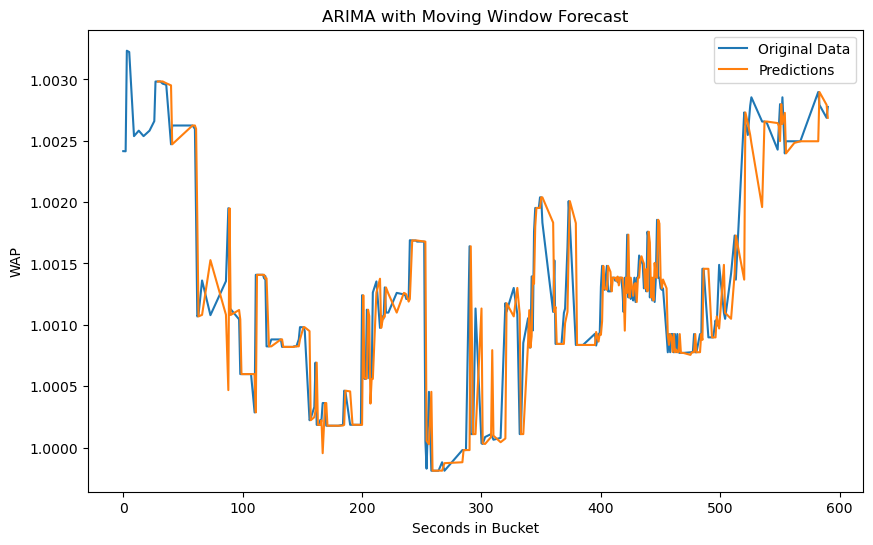

In [64]:
window_size = 10 
forecast_horizon = 1

predictions = arima_moving_window(df_filtered, window_size, forecast_horizon)

plt.figure(figsize=(10, 6))
plt.plot(df_filtered['seconds_in_bucket'], df_filtered['WAP'], label='Original Data')
plt.plot(df_filtered['seconds_in_bucket'].iloc[window_size+forecast_horizon-1:], predictions, label='Predictions')
plt.xlabel('Seconds in Bucket')
plt.ylabel('WAP')
plt.title('ARIMA with Moving Window Forecast')
plt.legend()
plt.show()


In [62]:
actual_values = df_filtered['WAP'][window_size:]
rmse = np.sqrt(mean_squared_error(actual_values, predictions))
rmse

0.0003637663299374234